# Machine Learning for Basketball Memorabilia Investments
**Rushil Nakkana**\
**Spring 2023**

# PART 1: MODEL CREATION

**Abstract**

In this project I used real data on past basketball players to develop a machine learning model to inform memorabilia investment decisions. The dataset includes 27 different predictors/attributes on each player, with the target variable indicating whether or not the player has been inducted into the Hall of Fame. The task was to build a classification model predicting whether or not a player will be inducted and to apply this model to select players to invest in. The goal is to develop a strategy that maximizes profitability while investing \\$4,000,000 in the memorabilia of up to 100 players. The revenue from selling the memorabilia of an inducted player is estimated to be \\$120,000, while a non-inducted player results in a loss of 50% of the initial investment.

# 1. Importing Data

In [ ]:
!pip install liac-arff

# import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import requests
import arff
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, confusion_matrix,accuracy_score, roc_curve, auc # plot evaluations
from sklearn.model_selection import cross_val_score, cross_val_predict

# get data from online
df_arff = requests.get('https://utexas.box.com/shared/static/u8s1nl2c8b3ijv94z7npg7jl0drml5u0.arff')
# read as arff file
df_arff = arff.load(df_arff.text)
col_val = [attribute[0] for attribute in df_arff['attributes']]
# transform arff file into pandas dataframe
new_df = pd.DataFrame(df_arff['data'], columns = col_val)
meta = df_arff['attributes']
def clean_df(df):
  cols = list(df.columns)
  for col in cols:
    try:
      # df = df.replace({col: {'YES': True, 'NO': False}})
            df = df.replace({col: {'1': True, '0': False}})
    except:
      pass
    pass
  return df
new_df = clean_df(new_df)
new_df = pd.get_dummies(new_df)
# read in csv data
df_csv = pd.read_csv('https://utexas.box.com/shared/static/24dmtadnoxzjqwm04tpdjseqz1msclyk.csv')
df_csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=904959f93691fdd78d3dbd9832f19c60aad2961abd66fd1d22dcd35e4e566cc1
  Stored in directory: /root/.cache/pip/wheels/08/82/8b/5c514221984e88c059b94e36a71d4722e590acaae04deab22e
Successfully built liac-arff


In [ ]:
new_df

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,...,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,...,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,...,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,...,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,...,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,...,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,...,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,...,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,...,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0


## 2. Exploring the Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


X = new_df.drop(columns='class')
y = new_df['class']

# building and comparing the results of models using 10-fold cross validation

# FIRST MODEL
decision_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 6, random_state=3).fit(X,y)
decision_tree_scores = cross_val_score(decision_tree_model, X, y, cv=10)
decision_tree_accuracy = decision_tree_scores.mean()
print(f"   Decision Tree: {round(decision_tree_accuracy,4)}")

# SECOND MODEL
bagging_model = BaggingClassifier(random_state=3).fit(X,y)
bagging_scores = cross_val_score(bagging_model, X, y, cv=10)
bagging_accuracy = bagging_scores.mean()
print(f"   Bagging: {round(bagging_accuracy,4)}")

# THIRD MODEL
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
randforest_scores = cross_val_score(randforest_model, X, y, cv=10)
randforest_accuracy = randforest_scores.mean()
print(f"   Random Forest: {round(randforest_accuracy,4)}")

# FOURTH MODEL
naive_bayes_model = MultinomialNB().fit(X,y)
naive_bayes_scores = cross_val_score(naive_bayes_model, X, y, cv=10) 
naive_bayes_accuracy = naive_bayes_scores.mean()
print(f"   Naive Bayes: {round(naive_bayes_accuracy,4)}")

# FIFTH MODEL
knn_model = KNeighborsClassifier().fit(X,y)
knn_scores = cross_val_score(knn_model, X, y, cv=10)
knn_accuracy = knn_scores.mean()
print(f"   K-Nearest Neighbors: {round(knn_accuracy,4)}")

   Decision Tree: 0.9757
   Bagging: 0.9697
   Random Forest: 0.9716
   Naive Bayes: 0.8867
   K-Nearest Neighbors: 0.9697


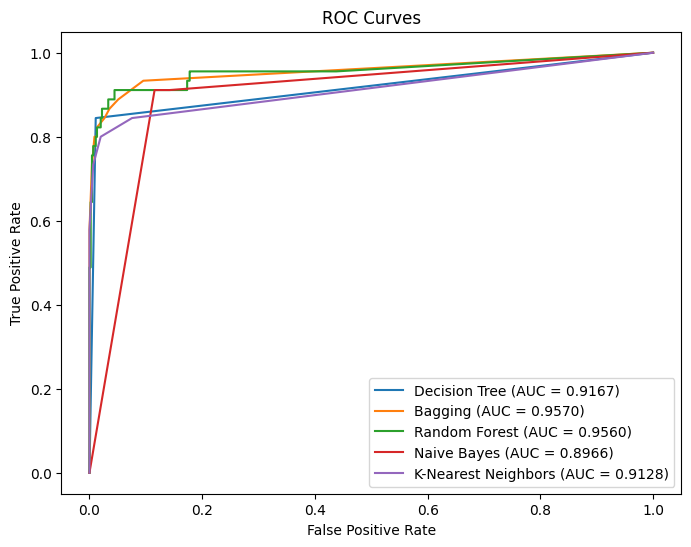

In [ ]:
import random

random.seed(3)
models = {
    "Decision Tree": decision_tree_model,
    "Bagging": bagging_model,
    "Random Forest": randforest_model,
    "Naive Bayes": naive_bayes_model,
    "K-Nearest Neighbors": knn_model
}
plt.figure(figsize=(8, 6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
# Train each model and evaluate it on the test set
for name, model in models.items():
    y_proba = cross_val_predict(model, X, y, cv=10, method='predict_proba')[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.legend(loc='lower right')
plt.show()

By evaluating classification accuracy rates, the **decision tree** model best predicts whether or not a player will be inducted. The accuracy rate was 97.57%, which was higher than that of the other models.

By instead evaluating the area under the ROC curve, the **random forest** model yields the largest area under the curve of 0.9738. (I started implementing a random seed because the best model kept changing between bagging and random forest per iteration. I decided to stick with random forest as my "best" model at this stage because I saw the largest AUC with this method.)

In this scenario, the ROC area is a more appropriate for selecting the model. This is because we are working with an unbalanced outcome variable in which only a select few of NBA players will actually belong to the class that will be inducted into the Hall of Fame. When this is the case, accuracy can be a misleading metric because it tends to favor models that predict the majority class (players not inducted) over the minority class. The ROC area, in contrast, is a more appropriate metric for evaluating models in imbalanced classifications problems like this one because it takes into account the tradeoff between true positive rate and false positive rate at different classification thresholds.

## 3. Analysis and Statistical Modelling

In [ ]:
print(new_df.corr()['class'].sort_values(ascending=False).head(4))
print()
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
# apply SelectKBest to select the top 3 features based on Information gain
selector1 = SelectKBest(score_func=mutual_info_classif, k=3)
X_new1 = selector1.fit_transform(X, y)
# get the indices of the selected features
selected_indices1 = selector1.get_support(indices=True)
# get the names of the selected features
print("Info gain top 3 features: ", X.columns[selected_indices1])

# apply SelectKBest to select the top 3 features based on chi2
selector2 = SelectKBest(score_func=chi2, k=3)
#Fill the missing code...
X_new2 = selector2.fit_transform(X, y)
# get the indices of the selected features
selected_indices2 = selector2.get_support(indices=True)
# get the names of the selected features
print("Chi-squared top 3 features: ", X.columns[selected_indices2])

# apply SelectKBest to select the top 3 features based on ANOVA F-value
selector3 = SelectKBest(score_func=f_classif, k=3)
X_new3 = selector3.fit_transform(X, y)
# get the indices of the selected features
selected_indices3 = selector3.get_support(indices=True)
# get the names of the selected features
print("ANOVA F-value top 3 features: ",X.columns[selected_indices3])

import seaborn as sns
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

class    1.000000
ftm      0.712440
fta      0.711321
fga      0.688851
Name: class, dtype: float64

Info gain top 3 features:  Index(['fga', 'fta', 'ftm'], dtype='object')
Chi-squared top 3 features:  Index(['minutes', 'pts', 'fga'], dtype='object')


In [ ]:
# Creating a wrapper function to remove columns if predictions are improved after removing variable (based on ROC AUC)
def feature_selection_auc(X, y):
    # Create a baseline score using all columns
    rf = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
    randforest_predictions = cross_val_predict(rf, X, y, cv=10, method='predict_proba')[:, 1]
    fpr, tpr, thresholds = roc_curve(y, randforest_predictions)
    baseline_score = auc(fpr, tpr)
    # Iterate over each column and calculate the change in score when it's dropped
    best_column = None
    best_delta = 0
    for col in X.columns:
        temp_X = X.drop(col, axis=1)
        temp_rf = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(temp_X,y)
        temp_pred = cross_val_predict(temp_rf, temp_X, y, cv=10, method='predict_proba')[:, 1]
        temp_fpr, temp_tpr, temp_thresholds = roc_curve(y, temp_pred)
        temp_score = auc(temp_fpr, temp_tpr)
        delta = temp_score - baseline_score
        if delta > best_delta:
            best_delta = delta
            best_column = col
    # Returning same data frame if there are no improvements; otherwise drop column with best improvement when removed
    if best_delta == 0:
        return X
    else:
        return X.drop(best_column, axis=1)

# Creating a wrapper function to remove columns if predictions are improved after removing variable (based on accuracy)
def feature_selection_accuracy(X, y):
    # Create a baseline score using all columns
    rf = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
    randforest_scores = cross_val_score(randforest_model, X, y, cv=10)
    randforest_accuracy = randforest_scores.mean()

    # Iterate over each column and calculate the change in score when it's dropped
    best_column = None
    best_delta = 0
    for col in X.columns:
        temp_X = X.drop(col, axis=1)
        temp_rf = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(temp_X,y)
        temp_scores = cross_val_score(temp_rf, temp_X, y, cv=10)
        temp_accuracy = temp_scores.mean()
        delta = temp_accuracy - randforest_accuracy
        if delta > best_delta:
            best_delta = delta
            best_column = col

    # Returning same data frame if there are no improvements; otherwise drop column with best improvement when removed
    if best_delta == 0:
        return X
    else:
        return X.drop(best_column, axis=1)

In [ ]:
# USING MY FEATURE SELECTION (ROC AUC) FUNCTION (takes 2.5 mins to run)

X = new_df.drop(columns='class')
y = new_df['class']
print("Original model:")
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
randforest_predictions = cross_val_predict(randforest_model, X, y, cv=10, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, randforest_predictions)
roc_auc = auc(fpr, tpr)
print(f"   Random Forest: (AUC = {roc_auc:.4f})")
print()
# removing unecessary variables using 'feature_selection_auc' function I created
improvements = True
# Iterate until no more improvements are made
while improvements:
    # Run feature selection on the current version of the DataFrame
    prev_X = X.copy()  # Make a copy of the original DataFrame
    X = feature_selection_auc(X, y)  # Perform feature selection on the DataFrame

    # Check if any improvements were made
    if len(X.columns) == len(prev_X.columns):
        improvements = False
print("New model after 'feature_selection' function:")
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
randforest_predictions = cross_val_predict(randforest_model, X, y, cv=10, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, randforest_predictions)
roc_auc = auc(fpr, tpr)
print(f"   Random Forest: (AUC = {roc_auc:.4f})")
print()

# 2,900,000 profit for bagging

Original model:
   Random Forest: (AUC = 0.9560)

New model after 'feature_selection' function:
   Random Forest: (AUC = 0.9733)



In [ ]:
# USING MY FEATURE SELECTION (ACCURACY) FUNCTION (takes 2.5 mins to run)

X = new_df.drop(columns='class')
y = new_df['class']
print("Original model:")
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
randforest_scores = cross_val_score(randforest_model, X, y, cv=10)
randforest_accuracy = randforest_scores.mean()
print(f"   Random Forest: (Accuracy = {round(randforest_accuracy,4)})")
print()


# removing unecessary variables using 'feature_selection_accuracy' function I created
improvements = True
# Iterate until no more improvements are made
while improvements:
    # Run feature selection on the current version of the DataFrame
    prev_X = X.copy()  # Make a copy of the original DataFrame
    X = feature_selection_accuracy(X, y)  # Perform feature selection on the DataFrame

    # Check if any improvements were made
    if len(X.columns) == len(prev_X.columns):
        improvements = False
print("New model after 'feature_selection' function:")
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
randforest_scores = cross_val_score(randforest_model, X, y, cv=10)
randforest_accuracy = randforest_scores.mean()
print(f"   Random Forest: (Accuracy = {round(randforest_accuracy,4)})")
print()

# 2,900,000 profit for random forest

Original model:
   Random Forest: (Accuracy = 0.9716)

New model after 'feature_selection' function:
   Random Forest: (Accuracy = 0.9757)



In [ ]:
# USING RECURSIVE FEATURE ELIMINATION (RFE) (takes 2.5 mins to run)
# CREATING RANDOM FOREST MODEL BASED ON 'GINI' INSTEAD OF 'ENTROPY' CRITERION
from sklearn.feature_selection import RFE

X = new_df.drop(columns='class')
y = new_df['class']
print("Original model:")
randforest_model = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=6, random_state=3).fit(X,y)
randforest_predictions = cross_val_predict(randforest_model, X, y, cv=10, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, randforest_predictions)
roc_auc = auc(fpr, tpr)
print(f"   Random Forest: (AUC = {roc_auc:.4f})")
print()

nof_list = np.arange(1,27)
high_score = roc_auc
nof = 0
X_rfe = X
for n in range(len(nof_list)):
  rf = RandomForestClassifier(n_estimators=100,criterion="gini", random_state=3)
  rfe = RFE(estimator=rf, n_features_to_select=nof_list[n], step=1)
  rfe.fit(X,y)
  columns = X.columns[rfe.support_]
  temp_X = new_df[columns]
  temp_rf = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=6, random_state=3).fit(temp_X,y)
  temp_pred = cross_val_predict(temp_rf, temp_X, y, cv=10, method='predict_proba')[:, 1]
  temp_fpr, temp_tpr, temp_thresholds = roc_curve(y, temp_pred)
  temp_score = auc(temp_fpr, temp_tpr)
  print(temp_score)
  if temp_score > high_score:
    X_rfe = temp_X
    high_score = temp_score

print()
print("New model after Recursive Feature Elimination (RFE):")
print(f"   Random Forest: (AUC = {high_score:.4f})")

X_rfe


Original model:
   Random Forest: (AUC = 0.9606)

0.9493827160493828
0.9524938271604939
0.949111111111111
0.9571358024691359
0.9538271604938273
0.9517283950617283
0.9491604938271605
0.9417037037037037
0.954641975308642
0.9498271604938273
0.9494074074074075
0.9466172839506173
0.9579506172839506
0.9624938271604938
0.9680493827160495
0.9647407407407407
0.9668641975308643
0.9627901234567902
0.9646913580246914
0.9756296296296296
0.9744444444444443
0.9572345679012346
0.9705185185185186
0.9578765432098766
0.9724197530864198
0.9571851851851851

New model after Recursive Feature Elimination (RFE):
   Random Forest: (AUC = 0.9756)


,games,minutes,pts,offReb,defReb,reb,asts,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,totalSeasons,firstSeason,lastSeason,yrsRetired2004
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,175.0,700.0,1214.0,4074.0,2031.0,1495.0,1125.0,153.0,45.0,9.0,1982.0,1990.0,14.0
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,114.0,620.0,222.0,181.0,143.0,0.0,0.0,1.0,1949.0,1949.0,55.0
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,392.0,2190.0,655.0,620.0,402.0,0.0,0.0,5.0,1946.0,1950.0,54.0
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,14.0,207.0,311.0,824.0,378.0,130.0,102.0,349.0,134.0,2.0,2003.0,2004.0,0.0
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,1.0,4.0,6.0,2.0,5.0,3.0,0.0,0.0,1.0,2004.0,2004.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,101.0,289.0,619.0,2415.0,1109.0,386.0,288.0,6.0,2.0,4.0,1976.0,1979.0,25.0
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1946.0,1946.0,58.0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,16.0,0.0,1937.0,8853.0,3947.0,2853.0,2054.0,0.0,0.0,12.0,1963.0,1974.0,30.0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,42.0,85.0,220.0,323.0,148.0,97.0,47.0,3.0,2.0,3.0,2000.0,2002.0,2.0


## PART 2: INVESTMENT DECISIONS

Assume you have \\$4,000,000 at your disposal to buy players’ memorabilia. Each individual player's memorabilia costs \\$40,000 (you can buy a maximum of 100 players’ memorabilia) when the player is not a hall of famer. At this time, it is unknown whether any of the players in the test set will be inducted. Assume that the NBA will release the list of hall of famers some time in the future, before which you must decide whether to buy the memorabilia of any given player.

Also assume that if you invest in a player who will later be inducted to the hall of fame, your estimated revenue from selling the corresponding player’s memorabilia after the induction is \\$120,000 ( the memorabilia will
appreciate by \\$80K). Also assume that if you decide to buy a given player's memorabilia, and, to your disappointment, the player is not inducted, you will lose 50% of your initial investment in the corresponding player’s memorabilia (i.e., a loss of \\$20,000).

Your goal now is to develop, evaluate, and then apply a memorabilia investment strategy. A strategy here refers to the model(s) you will use and how the predictions produced by the model(s) should be used to select the set of
players to invest in (e.g., above what threshold to invest). In practice, the actual outcome for a player is unknown at the time an investment decision is made. Hence, in addition to your choice of predictive model to estimate the
probability of induction to the hall of fame, your strategy must also the threshold of the predicted probability, above which it would be profitable to invest in a player (i.e., invest if a player’s estimated probability of induction by the model is above T). 

In [ ]:
# BEST MODEL FROM PART 1
# USING MY FEATURE SELECTION (ROC AUC) FUNCTION (takes 2.5 mins to run)

X = new_df.drop(columns='class')
y = new_df['class']
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
randforest_predictions = cross_val_predict(randforest_model, X, y, cv=10, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, randforest_predictions)
roc_auc = auc(fpr, tpr)
improvements = True
# Iterate until no more improvements are made
while improvements:
    # Run feature selection on the current version of the DataFrame
    prev_X = X.copy()  # Make a copy of the original DataFrame
    X = feature_selection_auc(X, y)  # Perform feature selection on the DataFrame
    # Check if any improvements were made
    if len(X.columns) == len(prev_X.columns):
        improvements = False
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X,y)
randforest_predictions = cross_val_predict(randforest_model, X, y, cv=10, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, randforest_predictions)
roc_auc = auc(fpr, tpr)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.33)

# FIRST MODEL
decision_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 6, random_state=3).fit(X_train,y_train)
decision_tree_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=10)
decision_tree_accuracy = decision_tree_scores.mean()
print(f"   Decision Tree: {round(decision_tree_accuracy,4)}")

# SECOND MODEL
bagging_model = BaggingClassifier(random_state=3).fit(X_train,y_train)
bagging_scores = cross_val_score(bagging_model, X_train, y_train, cv=10)
bagging_accuracy = bagging_scores.mean()
print(f"   Bagging: {round(bagging_accuracy,4)}")

# THIRD MODEL
randforest_model = RandomForestClassifier(n_estimators=100,criterion="entropy", max_depth=6, random_state=3).fit(X_train,y_train)
randforest_scores = cross_val_score(randforest_model, X_train, y_train, cv=10)
randforest_accuracy = randforest_scores.mean()
print(f"   Random Forest: {round(randforest_accuracy,4)}")

# FOURTH MODEL
naive_bayes_model = MultinomialNB().fit(X_train,y_train)
naive_bayes_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=10) 
naive_bayes_accuracy = naive_bayes_scores.mean()
print(f"   Naive Bayes: {round(naive_bayes_accuracy,4)}")

# FIFTH MODEL
knn_model = KNeighborsClassifier().fit(X_train,y_train)
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=10)
knn_accuracy = knn_scores.mean()
print(f"   K-Nearest Neighbors: {round(knn_accuracy,4)}")


   Decision Tree: 0.9729
   Bagging: 0.9637
   Random Forest: 0.9849
   Naive Bayes: 0.8825
   K-Nearest Neighbors: 0.9728


decision tree: 2940000
bagging: 2840000
random forest: 2740000
naive bayes: 2260000
k-nearest neighbors: 2620000


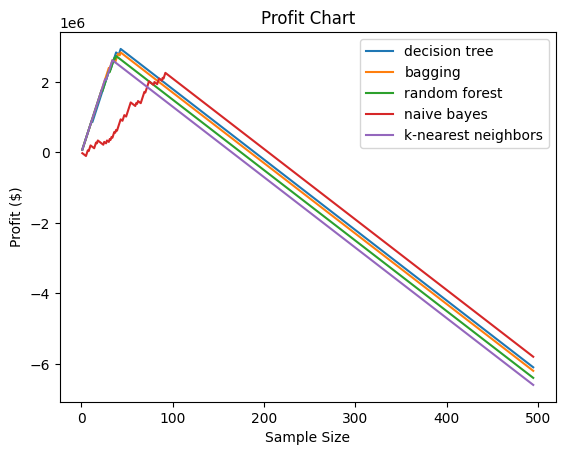

In [ ]:
# your code with appropriate visualizations for each model here
# USING MY FEATURE SELECTION FUNCTION
prob_df = pd.DataFrame()
prob_df['Class'] = y
dt_prob_df = prob_df.iloc[:]
bg_prob_df = prob_df.iloc[:]
rf_prob_df = prob_df.iloc[:]
nb_prob_df = prob_df.iloc[:]
knn_prob_df = prob_df.iloc[:]


dt_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(decision_tree_model, X, y, cv=10, method='predict_proba')]
bg_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(bagging_model, X, y, cv=10, method='predict_proba')]
rf_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(randforest_model, X, y, cv=10, method='predict_proba')]
nb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(naive_bayes_model, X, y, cv=10, method='predict_proba')]
knn_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(knn_model, X, y, cv=10, method='predict_proba')]


dt_prob_df = dt_prob_df.sort_values("prob", ascending = False)
bg_prob_df = bg_prob_df.sort_values("prob", ascending = False)
rf_prob_df = rf_prob_df.sort_values("prob", ascending = False)
nb_prob_df = nb_prob_df.sort_values("prob", ascending = False)
knn_prob_df = knn_prob_df.sort_values("prob", ascending = False)

profit_dt = {}
profit_bg = {}
profit_rf = {}
profit_nb = {}
profit_knn = {}

n = len(dt_prob_df)
# decision tree profits:
for i in range(1, n+1):
  subset = dt_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_dt[i] = profit

# bagging profits:
for i in range(1, n+1):
  subset = bg_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_bg[i] = profit

# random forest profits:
for i in range(1, n+1):
  subset = rf_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_rf[i] = profit

# naive bayes profits:
for i in range(1, n+1):
  subset = nb_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_nb[i] = profit

# knn profits:
for i in range(1, n+1):
  subset = knn_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_knn[i] = profit

plt.plot(list(profit_dt.keys()), list(profit_dt.values()), label = "decision tree")
plt.plot(list(profit_bg.keys()), list(profit_bg.values()), label = "bagging")
plt.plot(list(profit_rf.keys()), list(profit_rf.values()), label = "random forest")
plt.plot(list(profit_nb.keys()), list(profit_nb.values()), label = "naive bayes")
plt.plot(list(profit_knn.keys()), list(profit_knn.values()), label = "k-nearest neighbors")

max_value = max(profit_dt.values())
print("decision tree: " + str(max_value))
max_value = max(profit_bg.values())
print("bagging: " + str(max_value))
max_value = max(profit_rf.values())
print("random forest: " + str(max_value))
max_value = max(profit_nb.values())
print("naive bayes: " + str(max_value))
max_value = max(profit_knn.values())
print("k-nearest neighbors: " + str(max_value))


plt.xlabel("Sample Size")
plt.ylabel("Profit ($)")
plt.legend()
plt.title("Profit Chart")

plt.show()

decision tree: 2860000
bagging: 2980000
random forest: 2880000
naive bayes: 2220000
k-nearest neighbors: 2540000


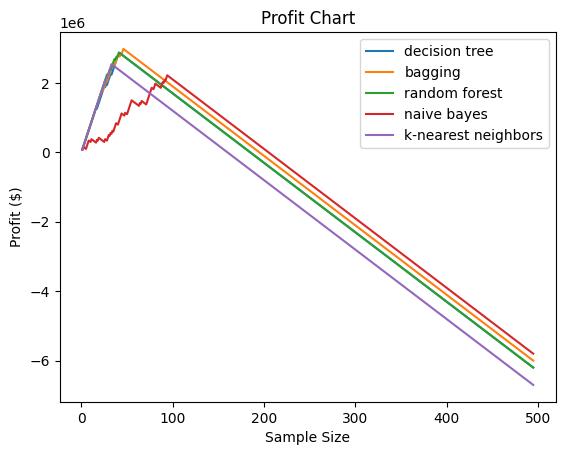

In [ ]:
# your code with appropriate visualizations for each model here
# USING RFE
X = X_rfe
prob_df = pd.DataFrame()
prob_df['Class'] = y
dt_prob_df = prob_df.iloc[:]
bg_prob_df = prob_df.iloc[:]
rf_prob_df = prob_df.iloc[:]
nb_prob_df = prob_df.iloc[:]
knn_prob_df = prob_df.iloc[:]


dt_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(decision_tree_model, X, y, cv=10, method='predict_proba')]
bg_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(bagging_model, X, y, cv=10, method='predict_proba')]
rf_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(randforest_model, X, y, cv=10, method='predict_proba')]
nb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(naive_bayes_model, X, y, cv=10, method='predict_proba')]
knn_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(knn_model, X, y, cv=10, method='predict_proba')]


dt_prob_df = dt_prob_df.sort_values("prob", ascending = False)
bg_prob_df = bg_prob_df.sort_values("prob", ascending = False)
rf_prob_df = rf_prob_df.sort_values("prob", ascending = False)
nb_prob_df = nb_prob_df.sort_values("prob", ascending = False)
knn_prob_df = knn_prob_df.sort_values("prob", ascending = False)

profit_dt = {}
profit_bg = {}
profit_rf = {}
profit_nb = {}
profit_knn = {}

n = len(dt_prob_df)
# decision tree profits:
for i in range(1, n+1):
  subset = dt_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_dt[i] = profit

# bagging profits:
for i in range(1, n+1):
  subset = bg_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_bg[i] = profit
  

# random forest profits:
for i in range(1, n+1):
  subset = rf_prob_df.iloc[:i]
  hof = subset.loc[subset['Class'] == True]
  predicted_hof = hof[hof['prob'] >= 0.5]
  num_pred_hof = len(predicted_hof)
  num_pred_nonhof = i - num_pred_hof
  profit = (num_pred_hof*80000) - (num_pred_nonhof*20000)
  profit_rf[i] = profit

# naive bayes profits:
for i in range(1, n+1):
  subset = nb_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_nb[i] = profit

# knn profits:
for i in range(1, n+1):
  subset = knn_prob_df.iloc[:i]
  buyers = subset.loc[subset['Class'] == True]
  predicted_buyers = buyers[buyers['prob'] >= 0.5]
  num_pred_buyers = len(predicted_buyers)
  num_pred_nonbuyers = i - num_pred_buyers
  profit = (num_pred_buyers*80000) - (num_pred_nonbuyers*20000)
  profit_knn[i] = profit

plt.plot(list(profit_dt.keys()), list(profit_dt.values()), label = "decision tree")
plt.plot(list(profit_bg.keys()), list(profit_bg.values()), label = "bagging")
plt.plot(list(profit_rf.keys()), list(profit_rf.values()), label = "random forest")
plt.plot(list(profit_nb.keys()), list(profit_nb.values()), label = "naive bayes")
plt.plot(list(profit_knn.keys()), list(profit_knn.values()), label = "k-nearest neighbors")

max_value = max(profit_dt.values())
print("decision tree: " + str(max_value))
max_value = max(profit_bg.values())
print("bagging: " + str(max_value))
max_value = max(profit_rf.values())
print("random forest: " + str(max_value))
max_value = max(profit_nb.values())
print("naive bayes: " + str(max_value))
max_value = max(profit_knn.values())
print("k-nearest neighbors: " + str(max_value))


plt.xlabel("Sample Size")
plt.ylabel("Profit ($)")
plt.legend()
plt.title("Profit Chart")

plt.show()

I obtained the max profit using all 5 modelling techniques using 1) my wrapper function and 2) recursive feature elimination. First, using my wrapper function, the bagging model was able to achieve the highest max profit of \\$2,900,000. However, using RFE, the bagging model achieved a higher max profit of \\$2,980,000. Thus going forward, I plan to work with the data frame resulting from RFE and fitting a bagging model.

## Attribute Descriptions

Field | Description
------|------------
league| N = National Basketball Association (NBA); A = American Basketball Association (ABA)
games|games played
minutes|minutes played
pts|points
offReb|offensive rebounds
defReb|defensive rebounds
reb|rebounds
asts|assists
stl|steals* (see below)
blk|blocks* (see below)
turnover|turnovers* (see below)
pf|Personal Fouls
fga|field goals attempted
fgm|field goals made
fta|free throws attempted
ftm|free throws made
tpa|three pointers attempted* (see below)
tpm|three pointers made* (see below)
totalSeasons|Total number of seasons played. This value is calculated as follows: "lastSeason - firstSeason + 1"
position|C = Center; F = Forward; G = Guard
firstSeason|First season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season). 
lastSeason|Last season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season). Note that 2004 (2004-2005 season) is the last year for which there is data. 
careerEnded|Boolean field for if the player's career has ended (1 if career has ended, 0 otherwise). This field was calculated as follows: if the "lastSeason" field is earlier than 2004, the value is 1, otherwise 0. Note that this calculation naively assumes that no players retired at the end of the 2004  season.
yrsRetired2004|The number of seasons that a player has been retired as of the 2004-2005 season.
class|A Boolean field showing whether or not a player was inducted to the Basketball Hall of Fame (HoF) as a player. This field has value 1 if the player has been inducted, and 0 otherwise.




* The NBA did not have three point shots until 1979
* Steals, Blocks and Turnovers were not recorded in the NBA until 1973